In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import requests as req
import os, json, csv, time, random, datetime, time 
from config import api_key
from citipy import citipy

In [2]:
# Assign the Cities' file to a variable 
cities_file = os.path.join(".", "Resources", "cities.csv")

### Create a list of cities utilizing citipy library

In [3]:
# Create lists with the complete latitudes and longitudes to better analysis accuracy. 
lat = [y for y in range (-88, 93, 4)]
lng = [x for x in range (-178, 188, 10)]

# Store the cities in a collection/set. This way we be sure we won't have any duplication.
collection = set()
# Line terminator to append to each city
lineterminator = '\r\n'
# Looping combining Latitudes and Longitudes to get cities 
for y in lat:
    for x in lng:
        # Get coordinates randomicaly from a small range. 
        rand_y = random.uniform( (y-2), (y+2) )
        rand_x = random.uniform( (x-2), (x+2) )
        # Get the nearest city of current coordinates
        city = citipy.nearest_city(rand_y,rand_x)
        collection.add(f"{city.city_name},{city.country_code}{lineterminator}")
#         print(f"City: {city.city_name}, Country:{city.country_code}, coord: {y},{x}")

# Preview total of cities 
print(f"Total of distinct cities: {len(collection)}")

Total of distinct cities: 673


In [4]:
# Save the selected cities in a csv file.
with open(cities_file, 'w') as writeFile:
    # Write the header
    writeFile.write(f"City,Country{lineterminator}")
    # Write the cities
    writeFile.writelines(collection)        

In [5]:
# Read the cities file
cities = pd.read_csv(cities_file, sep=',')  
# Convert the selected cities to a DataFrame
df_cities = pd.DataFrame(cities)
# Preview the DataFrame
df_cities.head()

,City,Country
0,erenhot,cn
1,zhangye,cn
2,klimovo,ru
3,port hedland,au
4,benguela,ao


In [6]:
# Create new fields for city.
df_cities["Cloudiness"] = None
df_cities["Date"] = None
df_cities["Humidity"] = 0
df_cities["Lat"] = 0.0
df_cities["Lng"] = 0.0
df_cities["Max Temp"] = 0.0
df_cities["Wind Speed"] = 0.0

# Set units to get the temperature in fahrenheit
units = "imperial"

# Set the default URL.
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units={units}"

In [7]:
# Utilize Open Weather API to fill new fields. 
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")       

# Loop to execute requests for each city. 
count = 0 
for index, row in df_cities.iterrows(): 
    # Uncomment the two lines below to process just 20 cities. It will take more than 10 minutes to process all cities. 
#     if count == 20:
#         break
    count += 1
        
    # Add one second interval between requests to be in compliance with  Open Weather 
    # API guideline ("Free users can make 60 requests per minute").
    time.sleep(1) 

    # Build query URL for current city and print log.
    # Regarding we have cities with same name in different countries, we are appending 
    # country code to request the right city.
    city_country = f"{row['City']},{row['Country']}" 
    query_url = f"{url}&q={city_country}"
    print(f"Processing Record {count} - ({city_country.replace(',','/')})")
    print(query_url)
    
    try:
        # Run the request
        result = req.get(query_url).json()
        # Fill fields
        df_cities.loc[index, 'Cloudiness'] = result['clouds']['all']
        df_cities.loc[index, 'Date'] = datetime.datetime.fromtimestamp( int(result['dt']) ).strftime('%Y-%m-%d %H:%M:%S')
        df_cities.loc[index, 'Humidity'] = result['main']['humidity']
        df_cities.loc[index, 'Lat'] = result['coord']["lat"]
        df_cities.loc[index, 'Lng'] = result['coord']["lon"]
        df_cities.loc[index, 'Max Temp'] = result['main']['temp_max']
        df_cities.loc[index, 'Wind Speed'] = result['wind']['speed']
    except:    
        print(f"We've got an error when processing city={city_country} - {result}.")
        # Remove the city with error from DF.
        df_cities.drop([index],inplace=True)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")       
        
# Remove any City missing data
df_cities.dropna(how="any", inplace=True)  
# Reindex DF
df_cities.reset_index(drop=True, inplace=True)   
# Preview total cities
print(f"Total cities remaining: {len(df_cities)}")


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 - (erenhot/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=erenhot,cn
Processing Record 2 - (zhangye/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zhangye,cn
Processing Record 3 - (klimovo/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=klimovo,ru
Processing Record 4 - (port hedland/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=port hedland,au
Processing Record 5 - (benguela/ao)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=benguela,ao
Processing Record 6 - (mayumba/ga)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mayumba,ga
Processin

Processing Record 52 - (panaba/mx)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=panaba,mx
Processing Record 53 - (hermanus/za)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=hermanus,za
Processing Record 54 - (capao da canoa/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=capao da canoa,br
Processing Record 55 - (sao gabriel da cachoeira/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sao gabriel da cachoeira,br
Processing Record 56 - (ponta do sol/cv)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ponta do sol,cv
Processing Record 57 - (rakhya/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=rakhya,ru
We've got an error when processing city=rakh

Processing Record 102 - (hay river/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=hay river,ca
Processing Record 103 - (poum/nc)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=poum,nc
Processing Record 104 - (kerouane/gn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kerouane,gn
Processing Record 105 - (escanaba/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=escanaba,us
Processing Record 106 - (bronnoysund/no)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bronnoysund,no
Processing Record 107 - (louisbourg/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=louisbourg,ca
We've got an error when processing city=louisbourg,ca - {'cod': '404', 'messag

Processing Record 151 - (tadine/nc)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tadine,nc
Processing Record 152 - (huilong/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=huilong,cn
Processing Record 153 - (severo-kurilsk/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=severo-kurilsk,ru
Processing Record 154 - (kaitangata/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kaitangata,nz
Processing Record 155 - (cayenne/gf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=cayenne,gf
Processing Record 156 - (ouango/cf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ouango,cf
We've got an error when processing city=ouango,cf - {'cod': '404', 'message': 

Processing Record 200 - (yuncheng/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=yuncheng,cn
Processing Record 201 - (gorontalo/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=gorontalo,id
Processing Record 202 - (black river/jm)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=black river,jm
Processing Record 203 - (zhigansk/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zhigansk,ru
Processing Record 204 - (upernavik/gl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=upernavik,gl
Processing Record 205 - (bathsheba/bb)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bathsheba,bb
Processing Record 206 - (isangel/vu)
http://api.openweathermap.org/dat

Processing Record 251 - (punta arenas/cl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=punta arenas,cl
Processing Record 252 - (laela/tz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=laela,tz
Processing Record 253 - (sentyabrskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sentyabrskiy,ru
We've got an error when processing city=sentyabrskiy,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 254 - (chalus/ir)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=chalus,ir
Processing Record 255 - (verkhnyaya inta/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=verkhnyaya inta,ru
Processing Record 256 - (sangmelima/cm)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc

Processing Record 302 - (frankfort/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=frankfort,us
Processing Record 303 - (elko/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=elko,us
Processing Record 304 - (agadir/ma)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=agadir,ma
Processing Record 305 - (corinto/ni)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=corinto,ni
Processing Record 306 - (opuwo/na)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=opuwo,na
Processing Record 307 - (vaitupu/wf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=vaitupu,wf
We've got an error when processing city=vaitupu,wf - {'cod': '404', 'message': 'city not found'}.
Proc

Processing Record 351 - (gushikawa/jp)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=gushikawa,jp
Processing Record 352 - (mataura/pf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mataura,pf
We've got an error when processing city=mataura,pf - {'cod': '404', 'message': 'city not found'}.
Processing Record 353 - (glenwood springs/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=glenwood springs,us
Processing Record 354 - (piste/mx)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=piste,mx
Processing Record 355 - (indaiatuba/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=indaiatuba,br
Processing Record 356 - (chuy/uy)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&uni

Processing Record 400 - (skjervoy/no)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=skjervoy,no
Processing Record 401 - (mys shmidta/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mys shmidta,ru
We've got an error when processing city=mys shmidta,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 402 - (swellendam/za)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=swellendam,za
Processing Record 403 - (hachinohe/jp)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=hachinohe,jp
Processing Record 404 - (saint-augustin/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=saint-augustin,ca
Processing Record 405 - (swan hill/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012b

Processing Record 449 - (cahors/fr)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=cahors,fr
Processing Record 450 - (buariki/ki)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=buariki,ki
We've got an error when processing city=buariki,ki - {'cod': '404', 'message': 'city not found'}.
Processing Record 451 - (arraial do cabo/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=arraial do cabo,br
Processing Record 452 - (nianzishan/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=nianzishan,cn
Processing Record 453 - (komsomolskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=komsomolskiy,ru
Processing Record 454 - (arroyos y esteros/py)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012b

Processing Record 497 - (tall kayf/iq)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tall kayf,iq
We've got an error when processing city=tall kayf,iq - {'cod': '404', 'message': 'city not found'}.
Processing Record 498 - (geraldton/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=geraldton,ca
Processing Record 499 - (kovdor/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kovdor,ru
Processing Record 500 - (ust-tsilma/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ust-tsilma,ru
Processing Record 501 - (ambulu/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ambulu,id
Processing Record 502 - (ucluelet/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imper

Processing Record 548 - (beringovskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=beringovskiy,ru
Processing Record 549 - (devyatka/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=devyatka,ru
We've got an error when processing city=devyatka,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 550 - (mweka/cd)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mweka,cd
Processing Record 551 - (sola/vu)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sola,vu
Processing Record 552 - (sorong/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sorong,id
Processing Record 553 - (mount pleasant/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q

Processing Record 598 - (san quintin/mx)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=san quintin,mx
We've got an error when processing city=san quintin,mx - {'cod': '404', 'message': 'city not found'}.
Processing Record 599 - (tolaga bay/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tolaga bay,nz
Processing Record 600 - (asht/tj)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=asht,tj
We've got an error when processing city=asht,tj - {'cod': '404', 'message': 'city not found'}.
Processing Record 601 - (saskylakh/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=saskylakh,ru
Processing Record 602 - (iberia/pe)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=iberia,pe
Processing Record 603 - (la plata/ar)


Processing Record 644 - (vostok/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=vostok,ru
Processing Record 645 - (mahebourg/mu)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mahebourg,mu
Processing Record 646 - (barranca/pe)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=barranca,pe
Processing Record 647 - (sena madureira/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sena madureira,br
Processing Record 648 - (palabuhanratu/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=palabuhanratu,id
We've got an error when processing city=palabuhanratu,id - {'cod': '404', 'message': 'city not found'}.
Processing Record 649 - (daru/pg)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b

In [8]:
# Preview new fields filled
df_cities.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,erenhot,cn,90,2019-07-04 10:56:19,56,43.65,111.97,71.04,19.04
1,zhangye,cn,32,2019-07-04 10:56:20,19,38.94,100.46,75.18,6.46
2,klimovo,ru,14,2019-07-04 10:56:21,57,52.38,32.20,64.02,11.92
3,port hedland,au,0,2019-07-04 10:56:22,82,-20.31,118.58,62.60,4.70
4,benguela,ao,20,2019-07-04 10:56:23,78,-12.58,13.40,73.40,4.70


In [9]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
City          580 non-null object
Country       580 non-null object
Cloudiness    580 non-null int64
Date          580 non-null object
Humidity      580 non-null int64
Lat           580 non-null float64
Lng           580 non-null float64
Max Temp      580 non-null float64
Wind Speed    580 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.9+ KB


In [10]:
# Get the analysis date. It will be used on title graphs.
analisys_date = df_cities.loc[0:0]["Date"][0]
# Get just the date, cut hour, min, and sec out. 
analisys_date = analisys_date[0:10]
# Format date and convert to String
dt = datetime.datetime.strptime(analisys_date, '%Y-%m-%d')
analisys_date = dt.strftime("%B %d, %Y")

In [11]:
# Set graphs stile  
plt.style.use('fivethirtyeight')

# Create a function to set graphs
def set_graph(y_axis, y_lim, title, y_label, image_file_name):
    # Start graph
    fig, ax = plt.subplots(figsize=(9,6))
    fig.set_facecolor('w')

    # Set commom params for all graphs
    x_axis = df_cities["Lat"].tolist()    
    x_lim = [-80, 100]
    x_label = "Latitude"
    
    # Set x and y limits
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Set the title
    ax.set_title(f"{title} ({analisys_date})", alpha=0.9, fontsize=15)

    # Set labels
    ax.set_xlabel(x_label, alpha=0.8, fontsize=14)
    ax.set_ylabel(y_label, alpha=0.8, fontsize=14)

    # Set stick
    ax.tick_params(direction='out', length=0, width=2, grid_color='w', labelsize='small', grid_linewidth=1.2)
    ax.scatter(x_axis, y_axis, marker="o",color="blue",edgecolors='black', s=40, alpha=0.8)
    
    # Save the graph image
    plt.savefig(image_file_name)

### Latitude vs Max Temperature Plot

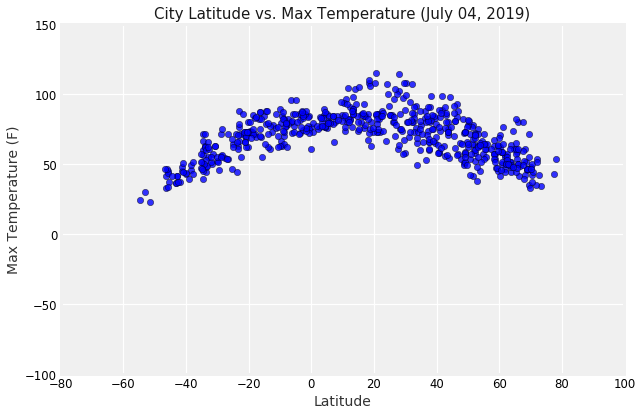

In [12]:
# Set the graph
set_graph(df_cities["Max Temp"].tolist(),     # y_axis
          [-100, 150],                        # ylim   
          "City Latitude vs. Max Temperature",# Title
          "Max Temperature (F)",              # yLabel
          "Latitude_vs_MaxTemperature.png")   # image_file_name

# Show the Figure
plt.show()

### Latitude vs. Humidity Plot

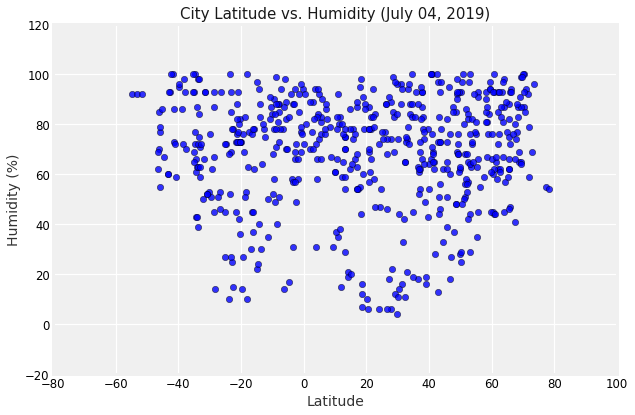

In [13]:
# Set graph
set_graph(df_cities["Humidity"].tolist(), # y_axis
          [-20, 120],                     # ylim   
          "City Latitude vs. Humidity",   # Title
          "Humidity (%)",                 # yLabel
          "Latitude_vs_Humidity.png")     # image_file_name

# Show the Figure
plt.show()

### Latitude vs. Cloudiness Plot

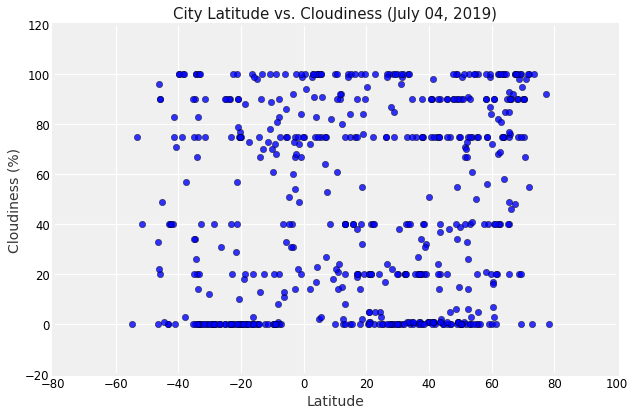

In [14]:
# Set graph
set_graph(df_cities["Cloudiness"].tolist(),# y_axis
          [-20, 120],                      # ylim   
          "City Latitude vs. Cloudiness",  # Title
          "Cloudiness (%)",                # yLabel
          "CityLatitude_vs_Cloudiness.png")# image_file_name

# Show the Figure
plt.show()


### Latitude vs. Wind Speed Plot

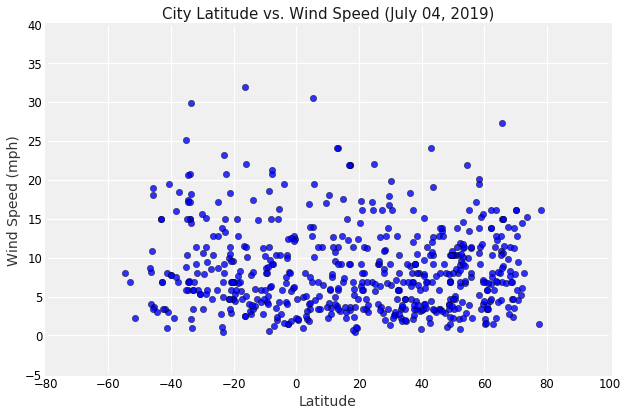

In [15]:
# Set graph
set_graph(df_cities["Wind Speed"].tolist(),# y_axis
          [-5, 40],                        # ylim   
          "City Latitude vs. Wind Speed",  # Title
          "Wind Speed (mph)",              # yLabel
          "Latitude_vs_WindSpeed.png")     # image_file_name

# Show the Figure
plt.show()

In [16]:
# Save Cities Data.
df_cities.to_csv(cities_file, encoding="utf-8", index=False)